In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM
# from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os

In [2]:
data_df =  pd.read_csv("prices-split-adjusted.csv", index_col = 0)
data_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


In [4]:
data_df['date'] = data_df.index
data_df

,symbol,open,close,low,high,volume,date
date,,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2016-01-05
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,2016-01-06
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,2016-01-07
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,2016-01-08
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,2016-01-11
...,...,...,...,...,...,...,...
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,2016-12-30
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,2016-12-30
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,2016-12-30


In [5]:
data_df['date'] = pd.to_datetime(data_df['date'], format='%Y-%m-%d')
data_df

,symbol,open,close,low,high,volume,date
date,,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2016-01-05
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,2016-01-06
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,2016-01-07
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,2016-01-08
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,2016-01-11
...,...,...,...,...,...,...,...
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,2016-12-30
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,2016-12-30
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,2016-12-30


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  851264 non-null  object        
 1   open    851264 non-null  float64       
 2   close   851264 non-null  float64       
 3   low     851264 non-null  float64       
 4   high    851264 non-null  float64       
 5   volume  851264 non-null  float64       
 6   date    851264 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 52.0+ MB


In [7]:
data = data_df[data_df['symbol'] == 'AAPL']
data

,symbol,open,close,low,high,volume,date
date,,,,,,,
2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0,2010-01-04
2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0,2010-01-05
2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0,2010-01-06
2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0,2010-01-07
2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0,2010-01-08
...,...,...,...,...,...,...,...
2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0,2016-12-23
2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0,2016-12-27
2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0,2016-12-28


In [8]:
data = data.drop(['symbol'], axis=1)
data

,open,close,low,high,volume,date
date,,,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0,2010-01-04
2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0,2010-01-05
2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0,2010-01-06
2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0,2010-01-07
2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0,2010-01-08
...,...,...,...,...,...,...
2016-12-23,115.589996,116.519997,115.589996,116.519997,14249500.0,2016-12-23
2016-12-27,116.519997,117.260002,116.489998,117.800003,18296900.0,2016-12-27
2016-12-28,117.519997,116.760002,116.199997,118.019997,20905900.0,2016-12-28


In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(data['close'].values.reshape(-1,1))

In [18]:
dataset[0:20]

array([[2.97178362e-02],
       [3.02185399e-02],
       [2.56038867e-02],
       [2.50761176e-02],
       [2.69707045e-02],
       [2.44400840e-02],
       [2.12057623e-02],
       [2.51708493e-02],
       [2.35198553e-02],
       [1.87834049e-02],
       [3.11117019e-02],
       [2.66323798e-02],
       [2.16794006e-02],
       [7.71364371e-03],
       [1.49130510e-02],
       [1.87969390e-02],
       [2.14222912e-02],
       [9.79767512e-03],
       [1.35327151e-05],
       [3.62676096e-03]])

In [20]:
train_size = int(len(dataset)*0.7)
test_size = len(dataset) - train_size

In [21]:
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1233 529


In [23]:
print(len(data))
print(1233 + 529)

1762
1762


In [27]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [28]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1217, 15)
(1217,)
(513, 15)
(513,)


In [31]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1217, 1, 15)
(1217,)
(513, 1, 15)
(513,)


In [33]:
# create and fit the LSTM network
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

C:\Users\User\Downloads\anaconda\envs\new\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1217/1217 - 2s - 2ms/step - loss: 0.0020
Epoch 2/20
1217/1217 - 1s - 683us/step - loss: 5.2676e-04
Epoch 3/20
1217/1217 - 1s - 691us/step - loss: 3.9625e-04
Epoch 4/20
1217/1217 - 1s - 712us/step - loss: 3.7733e-04
Epoch 5/20
1217/1217 - 1s - 695us/step - loss: 3.4177e-04
Epoch 6/20
1217/1217 - 1s - 675us/step - loss: 3.2952e-04
Epoch 7/20
1217/1217 - 1s - 686us/step - loss: 3.0424e-04
Epoch 8/20
1217/1217 - 1s - 689us/step - loss: 2.8058e-04
Epoch 9/20
1217/1217 - 1s - 692us/step - loss: 2.6037e-04
Epoch 10/20
1217/1217 - 1s - 679us/step - loss: 2.8347e-04
Epoch 11/20
1217/1217 - 1s - 656us/step - loss: 2.5925e-04
Epoch 12/20
1217/1217 - 1s - 651us/step - loss: 2.4482e-04
Epoch 13/20
1217/1217 - 1s - 693us/step - loss: 2.4526e-04
Epoch 14/20
1217/1217 - 1s - 686us/step - loss: 2.6587e-04
Epoch 15/20
1217/1217 - 1s - 664us/step - loss: 2.4339e-04
Epoch 16/20
1217/1217 - 1s - 658us/step - loss: 2.3826e-04
Epoch 17/20
1217/1217 - 1s - 675us/step - loss: 2.2042e-04
Epoch 18/20


In [38]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
Train Score: 1.38 RMSE
Test Score: 2.06 RMSE


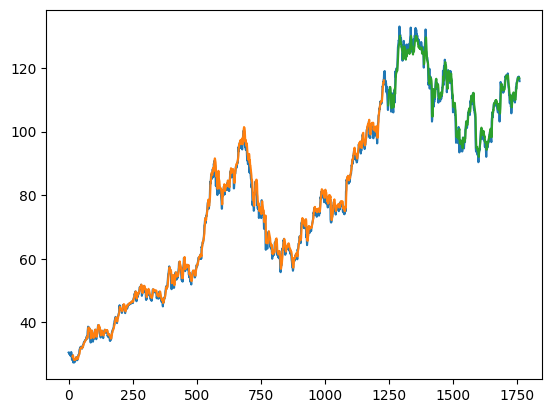

In [39]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()